In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

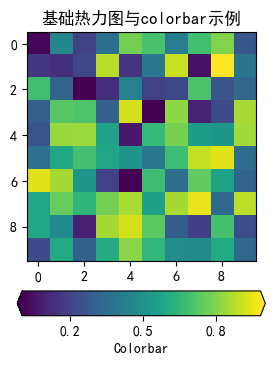

In [3]:
# 生成随机数据（10x10矩阵）
data = np.random.rand(10, 10)

# 创建热力图（使用默认colormap）
im = plt.imshow(data)

# 添加色彩条
plt.colorbar(shrink=0.5 ,               # 将色彩条的长度缩小为原来的50%
             aspect=10 ,                # 设置色彩条的宽高比为10
             orientation='horizontal' , # 将色彩条设置为水平方向（默认是垂直）
             label='Colorbar' ,         # 为色彩条添加标签文本
             ticks=[0.2,0.5,0.8],       # 设置要显示的刻度
             extend='both',             # 在色彩条的两端添加箭头，表示数据可能超出当前显示范围
             pad=0.08,                  # 设置colorbar与主图之间的间距
             fraction=0.3,              # 设置colorbar相对于主图的大小比例
             extendfrac=0.02            # 设置控制扩展箭头的大小
            )
# 显式指定与哪个图像对象关联，当有多个子图时很有用
# plt.colorbar(im)

# 显示图表
plt.title('基础热力图与colorbar示例')
plt.show()

# 2、多子图中共享 colorbar：

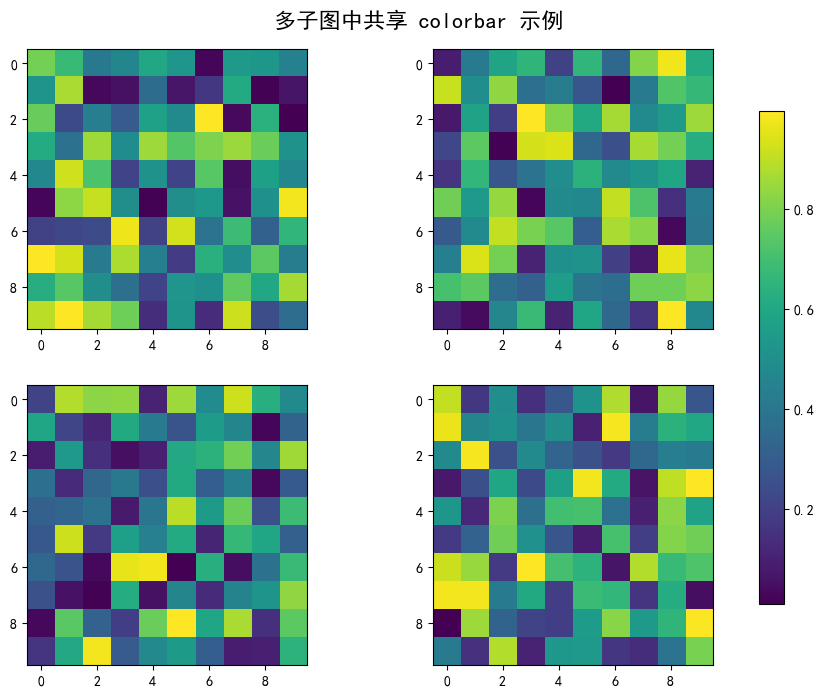

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 绘制四个子图
im1 = axes[0,0].imshow(np.random.rand(10, 10), cmap='viridis')
im2 = axes[0,1].imshow(np.random.rand(10, 10), cmap='viridis')
im3 = axes[1,0].imshow(np.random.rand(10, 10), cmap='viridis')
im4 = axes[1,1].imshow(np.random.rand(10, 10), cmap='viridis')

# 创建共享colorbar
fig.colorbar(im1, 
             ax=axes.ravel().tolist(),  # 将子图数组转换为一维列表，传递给 colorbar，使其与所有子图关联
             shrink=0.8)

# 设置总标题
fig.suptitle('多子图中共享 colorbar 示例', y=0.93, fontsize=16)
# 显示图表
plt.show()

# 3、控制位置与尺寸

### 3.1 手动创建 Axes 并指定 cax

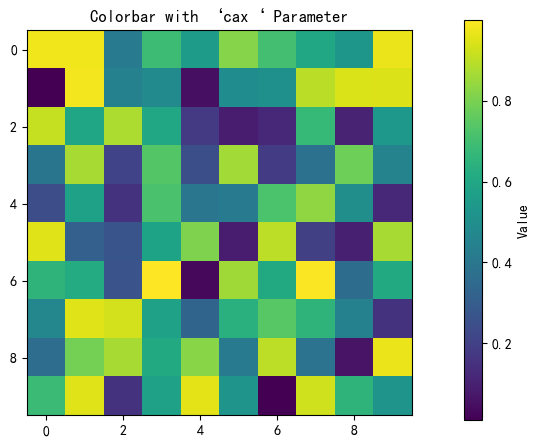

In [5]:
# 创建一些数据
data = np.random.rand(10, 10)

# 创建图形和主图 Axes
fig, ax = plt.subplots(figsize=(6, 5))

# 绘制主图
im = ax.imshow(data, cmap='viridis')

# 1. 为颜色条手动创建一个 Axes
cax_rect = [0.92, 0.1, 0.03, 0.8] # 调整这些值可以精确控制位置和大小
cax = fig.add_axes(cax_rect) # 创建一个新的 Axes 对象

# 2. 将创建好的 cax 传递给 colorbar 函数
cbar = fig.colorbar(im, cax=cax)

# 可选：在颜色条 Axes 上设置标签
cbar.set_label('Value')

ax.set_title("Colorbar with ‘cax‘ Parameter")
plt.show()

### 3.2 结合 GridSpec 精确控制布局

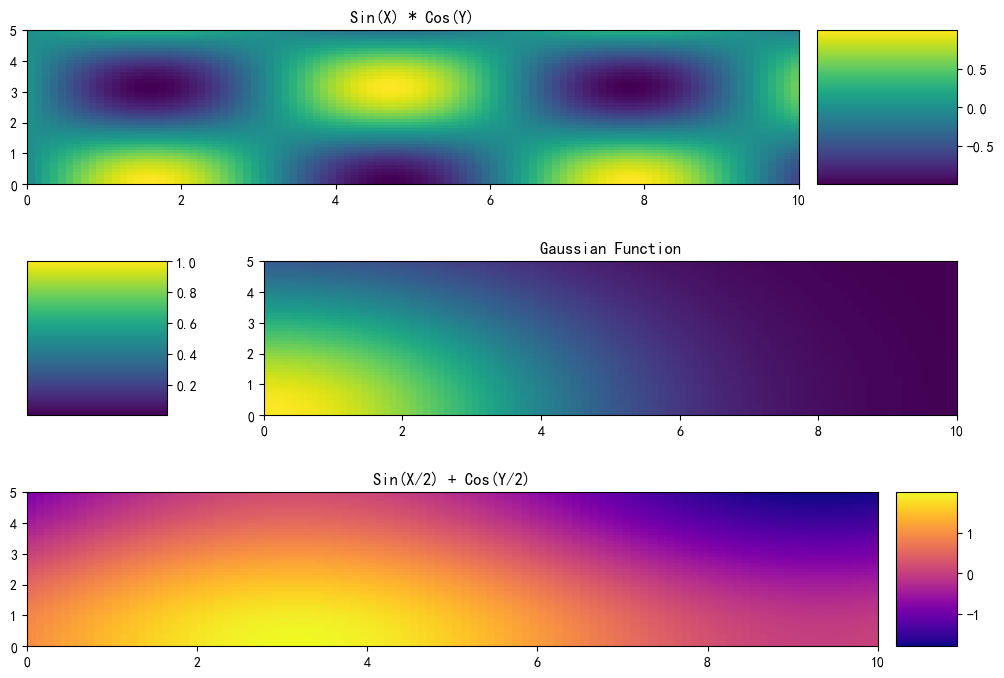

In [6]:
from matplotlib.gridspec import GridSpec

# 创建示例数据
x = np.linspace(0, 10, 100)
y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x, y)
Z1 = np.sin(X) * np.cos(Y)
Z2 = np.exp(-(X**2 + Y**2) / 20)
Z3 = np.sin(X/2) + np.cos(Y/2)

# 创建图形
fig = plt.figure(figsize=(12, 8))

# 使用GridSpec定义网格布局
# 创建一个3行12列的网格布局，这为我们提供了精细控制每个元素位置的能力
gs = GridSpec(3, 12, figure=fig, wspace=0.3, hspace=0.5)

# 第一个子图及其colorbar
ax1 = fig.add_subplot(gs[0, :10])  # 第1行，前10列用于绘图
im1 = ax1.imshow(Z1, aspect='auto', origin='lower', extent=[0,10,0,5])
ax1.set_title('Sin(X) * Cos(Y)')
cax1 = fig.add_subplot(gs[0, 10:12])  # 第1行，后2列用于colorbar
fig.colorbar(im1, cax=cax1)

# 第二个子图及其colorbar
ax2 = fig.add_subplot(gs[1, 3:12])  # 第2行，后10列用于绘图
im2 = ax2.imshow(Z2, aspect='auto', origin='lower', extent=[0,10,0,5], cmap='viridis')
ax2.set_title('Gaussian Function')
cax2 = fig.add_subplot(gs[1, :2])  # 第2行，前2列用于colorbar
fig.colorbar(im2, cax=cax2)

# 第三个子图及其更窄的colorbar
ax3 = fig.add_subplot(gs[2, :11])  # 第3行，前11列用于绘图
im3 = ax3.imshow(Z3, aspect='auto', origin='lower', extent=[0,10,0,5], cmap='plasma')
ax3.set_title('Sin(X/2) + Cos(Y/2)')
cax3 = fig.add_subplot(gs[2, 11:12])  # 第3行，最后1列用于colorbar
fig.colorbar(im3, cax=cax3)

plt.show()

# 4、自定义 colorbar 的刻度与标签

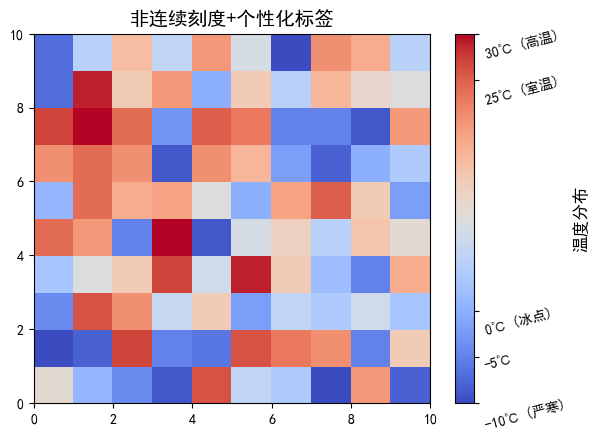

In [7]:
# 生成数据（模拟温度分布，范围：-10~30℃）
data = np.random.randint(-10, 31, size=(10, 10))
heatmap = plt.pcolor(data, cmap='coolwarm')  # pcolor返回ScalarMappable对象
cbar = plt.colorbar(heatmap)

# 自定义非连续刻度：突出零下、0℃、室温、高温
cbar.set_ticks([-10, -5, 0, 25, 30])

# 自定义标签：结合文本与符号（如℃）
cbar.set_ticklabels([
    '-10℃ (严寒)', 
    '-5℃', 
    '0℃ (冰点)', 
    '25℃ (室温)', 
    '30℃ (高温)'
])

# 调整标签样式
cbar.ax.tick_params(labelsize=10, labelrotation=15)  # 设置颜色条刻度标签的样式：字体大小10，旋转15度
cbar.set_label('温度分布', fontsize=12, fontweight='bold') # 设置颜色条的标题
plt.title('非连续刻度+个性化标签', fontsize=14) # 设置整个图表的标题
plt.show()